# 使用PCA对人脸图片进行处理

此部分作业要求使用PCA技术对给定的人脸数据集进行处理，你需要在该文件中完成你的代码，并输出结果。



本次使用到的人脸数据集是 ORL人脸数据集，共包含40个不同人的400张图像。此数据集下包含40个目录，每个目录下有10张图像，每个目录表示一个不同的人。所有的图像是以PGM格式存储，灰度图，图像大小宽度为92，高度为112。



数据集中部分图像示例：

![image-20230428112024592](./faces.png)



在本次作业中，你需要**按顺序**完成以下内容并且在该文件中**保留要求**的输出结果：

1. 将数据集划分为80%的训练集，20%的测试集，在训练集上使用PCA将特征维度降为100，即得到100个特征和其对应的特征向量，并使用训练得到的PCA将测试集维度也压缩到100，**输出：压缩后的训练集维度和测试集维度、经过PCA得到的特征向量维度**。

2. 得到100个特征向量后，**使用这些向量重建特征脸并输出**。示例：

   ![image2](./feature.png)

3. 使用这100个特征和对应的特征向量，自行在训练集和测试集中**分别**选择**5张**人脸图片进行人脸重建并**输出对比图**。示例：

   ![image2](./restore.png)

4. **输出**降维后**每个**新特征向量所占的信息量占原始数据总信息量的百分比，以及所有返回特征所携带的**信息量总和**是原始数据的多少；

5. **画出**特征个数和所携带信息数的曲线图，此处特征数**上限设置为150**，此处以150为示例：

   ![image2](./information.png)

6.  保留特征数为150，得到的训练集每次保留前（n=n+1，n初值为1）个特征，分别训练一个KNN分类器，KNN分类器的参数*n_neighbors*为3，观察并验证测试集在使用其前n个特征时KNN分类的准确率。**注意：此处仅进行一次PCA**,输出：不同的特征保留数和准确率的曲线图。此处以*n_neighbors=5*为示例：

   ![image2](./acc.png)

   **本次作业严禁抄袭，一经发现严肃处理**


#  附加题

若感兴趣，可以自行拍摄自己或舍友的人脸照片、或者其他较为简单且特征明显的数据集进行PCA操作。


In [28]:
# 本次作业你可能需要用到的包和函数

%matplotlib inline
# 导入所需模块
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

# 读取一个文件夹下的所有图片，输入参数是文件名，返回文件地址列表
def read_directory(directory_name):
    faces_addr = []
    for filename in os.listdir(directory_name):
        faces_addr.append(directory_name + "/" + filename)
    return faces_addr

In [29]:
# 读取所有人脸数据
face_data = []
face_label = []
for i in range(40):
    directory_name = '/data/zcy/Computer_Vision/Homework1/part2/data/s'+str(i+1)
    faces_addr = read_directory(directory_name)
    for j in range(len(faces_addr)):
        img = cv2.imread(faces_addr[j],0)
        face_data.append(img)
        face_label.append(i+1)
# 划分训练集和测试集
train_data, test_data, train_label, test_label = train_test_split(face_data, face_label, test_size=0.2, random_state=0)

# 将训练集数据转化为矩阵形式
train_matrix = np.zeros((len(train_data),92*112))
for i in range(len(train_data)):
    train_matrix[i,:] = np.reshape(train_data[i],(1,92*112))

# 计算PCA特征
pca = PCA(n_components=100)
train_pca = pca.fit_transform(train_matrix)

# 将测试集数据转化为矩阵形式并降维
test_matrix = np.zeros((len(test_data),92*112))
for i in range(len(test_data)):
    test_matrix[i,:] = np.reshape(test_data[i],(1,92*112))
test_pca = pca.transform(test_matrix)

# 输出压缩后的训练集维度和测试集维度
print("降维前的训练集维度为：{}".format(train_matrix.shape))
print("降维后的训练集维度为：{}".format(train_pca.shape))
print("降维前的测试集维度为：{}".format(test_matrix.shape))
print("降维后的测试集维度为：{}".format(test_pca.shape))

降维前的训练集维度为：(320, 10304)
降维后的训练集维度为：(320, 100)
降维前的测试集维度为：(80, 10304)
降维后的测试集维度为：(80, 100)


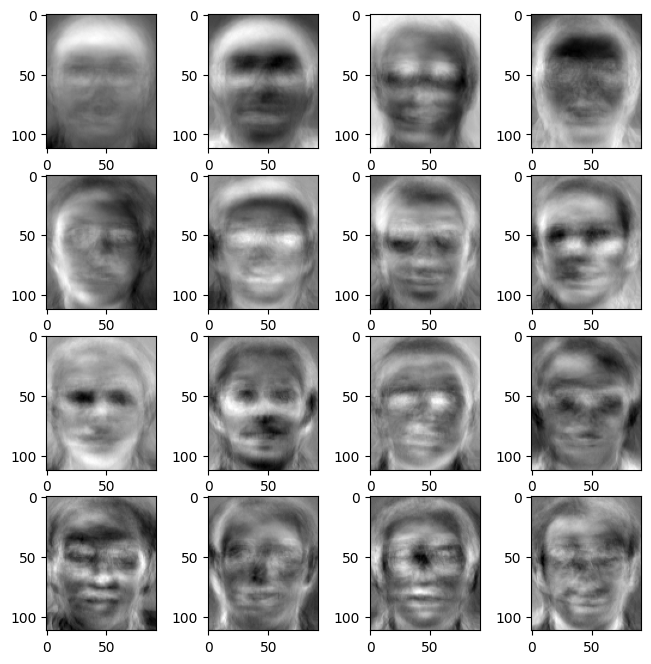

In [30]:
# 将PCA得到的特征向量重构成特征脸并输出
eigenfaces = pca.components_
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(np.reshape(eigenfaces[i,:],(112,92)), cmap='gray')
plt.show()

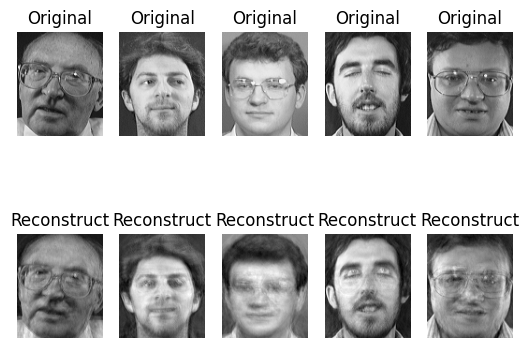

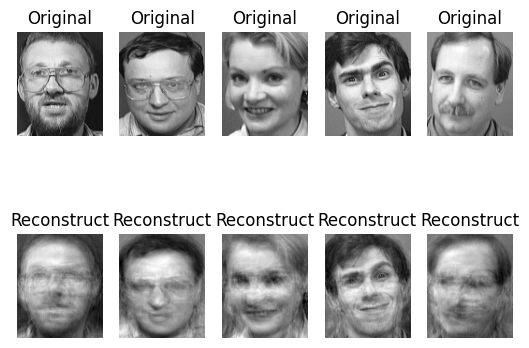

In [31]:
# 重建训练集和测试集中的人脸图像并输出对比图
n = 5   # 需要重建的人脸数量
for i in range(n):
    # 选择训练集中第i张人脸进行重建并输出对比图
    face = train_data[i]
    face_reconstruct = pca.inverse_transform(train_pca[i])
    plt.subplot(2,n,i+1)
    plt.title('Original')
    plt.imshow(face,cmap='gray')
    plt.axis('off')
    plt.subplot(2,n,i+n+1)
    plt.title('Reconstruct')
    plt.imshow(face_reconstruct.reshape(112,92),cmap='gray')
    plt.axis('off')
    
plt.show()


for i in range(n):
    # 选择测试集中第i张人脸进行重建并输出对比图
    face = test_data[i]
    face_reconstruct = pca.inverse_transform(test_pca[i])
    plt.subplot(2,n,i+1)
    plt.title('Original')
    plt.imshow(face,cmap='gray')
    plt.axis('off')
    plt.subplot(2,n,i+n+1)
    plt.title('Reconstruct')
    plt.imshow(face_reconstruct.reshape(112,92),cmap='gray')
    plt.axis('off')
plt.show()

In [32]:
var_ratio = pca.explained_variance_ratio_
for i in range(len(var_ratio)):
    print("第{}个新特征向量所占的信息量占原始数据总信息量的百分比为：{:.2%}".format(i+1,var_ratio[i]))
total_var_ratio = sum(var_ratio)
print("所有返回特征所携带的信息量总和是原始数据的{:.2%}".format(total_var_ratio))

第1个新特征向量所占的信息量占原始数据总信息量的百分比为：17.14%
第2个新特征向量所占的信息量占原始数据总信息量的百分比为：13.93%
第3个新特征向量所占的信息量占原始数据总信息量的百分比为：6.94%
第4个新特征向量所占的信息量占原始数据总信息量的百分比为：5.20%
第5个新特征向量所占的信息量占原始数据总信息量的百分比为：5.06%
第6个新特征向量所占的信息量占原始数据总信息量的百分比为：3.46%
第7个新特征向量所占的信息量占原始数据总信息量的百分比为：2.50%
第8个新特征向量所占的信息量占原始数据总信息量的百分比为：2.38%
第9个新特征向量所占的信息量占原始数据总信息量的百分比为：2.02%
第10个新特征向量所占的信息量占原始数据总信息量的百分比为：1.79%
第11个新特征向量所占的信息量占原始数据总信息量的百分比为：1.45%
第12个新特征向量所占的信息量占原始数据总信息量的百分比为：1.40%
第13个新特征向量所占的信息量占原始数据总信息量的百分比为：1.17%
第14个新特征向量所占的信息量占原始数据总信息量的百分比为：1.06%
第15个新特征向量所占的信息量占原始数据总信息量的百分比为：1.03%
第16个新特征向量所占的信息量占原始数据总信息量的百分比为：0.92%
第17个新特征向量所占的信息量占原始数据总信息量的百分比为：0.88%
第18个新特征向量所占的信息量占原始数据总信息量的百分比为：0.81%
第19个新特征向量所占的信息量占原始数据总信息量的百分比为：0.76%
第20个新特征向量所占的信息量占原始数据总信息量的百分比为：0.70%
第21个新特征向量所占的信息量占原始数据总信息量的百分比为：0.69%
第22个新特征向量所占的信息量占原始数据总信息量的百分比为：0.64%
第23个新特征向量所占的信息量占原始数据总信息量的百分比为：0.61%
第24个新特征向量所占的信息量占原始数据总信息量的百分比为：0.56%
第25个新特征向量所占的信息量占原始数据总信息量的百分比为：0.54%
第26个新特征向量所占的信息量占原始数据总信息量的百分比为：0.51%
第27个新特征向量所占的信息量占原始数据总信息量的百分比为：0.49%
第28个新特征向量所占的信息量占原始数据总信息量的百分比为：0.47%

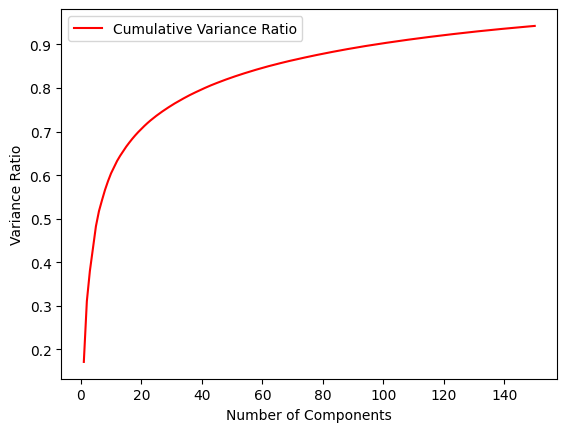

In [36]:
import matplotlib.pyplot as plt

# 特征个数上限
n_features = 150

# PCA降维计算
pca = PCA(n_components=n_features)
pca.fit(train_matrix)

# 计算特征个数和所携带信息数百分比
n_components = []
explained_variances = []
cumulative_variances = []
for i in range(1, n_features+1):
    n_components.append(i)
    explained_variances.append(pca.explained_variance_ratio_[i-1])
    cumulative_variances.append(sum(pca.explained_variance_ratio_[:i]))

# 画图
# plt.plot(n_components, explained_variances, 'b', label='Explained Variance Ratio')
plt.plot(n_components, cumulative_variances, 'r', label='Cumulative Variance Ratio')
plt.legend()
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.show()



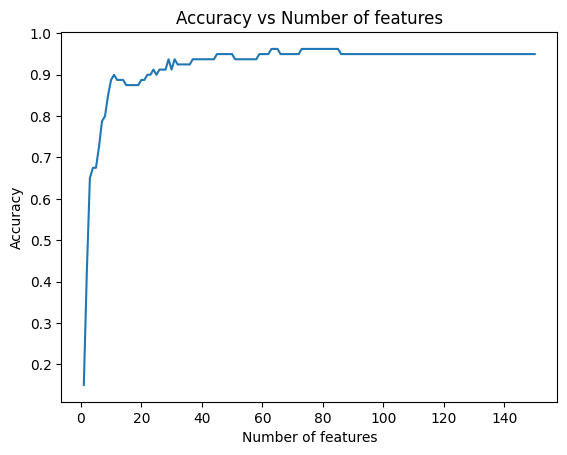

In [37]:
# 导入需要使用的库和函数
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 定义特征数列表和准确率列表
n_feature = []
accuracy = []

# 构建KNN分类器，并在保留特征数从1到150的情况下分别训练，并计算分类准确率
for i in range(150):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_pca[:, :i+1], train_label)
    acc = knn.score(test_pca[:, :i+1], test_label)
    n_feature.append(i+1)
    accuracy.append(acc)

# 绘制保留特征数和准确率的曲线图
plt.plot(n_feature, accuracy)
plt.title('Accuracy vs Number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()
